In [2]:
from pathlib import Path
import xarray as xr

data_path = Path("/home/ET/mnwong/ML/data/Qobs10_SPCAMM.000.cam.h1.0001-02-13-00800.nc")
with xr.open_dataset(data_path) as ds:
    display(ds)
    print("\nData variables:", list(ds.data_vars))
    print("Coordinates:", list(ds.coords))

<xarray.Dataset>
Dimensions:       (lat: 384, lon: 576, lev: 30, ilev: 31, time: 27, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -89.53 -89.06 -88.59 ... 89.06 89.53 90.0
  * lon           (lon) float64 0.0 0.625 1.25 1.875 ... 357.5 358.1 358.8 359.4
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 0001-02-13 00:13:20 ... 0001-02-13 06:00:00
Dimensions without coordinates: nbnd
Data variables: (12/64)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    T             (time, lev, lat, lon) float64 ...
    TAUX          (time, lat, lon) float64 ...
    TAUY          (time, lat, lon) float64 ...
    U             (time, lev, lat, lon) float64 ...
    V             (time, lev, lat, lon) float64 ...
    Z3            (time, lev, lat, lon) float64 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              Qobs10_SPCAMM.000_cont
    logname:           tnchow
    host:              
    initial_file:      /home/ET/tnchow/cesm/Qobs10_SPCAMM.000/run/Qobs10_init...
    topography_file:   bnd_topo
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  second_800


Data variables: ['gw', 'hyam', 'hybm', 'P0', 'hyai', 'hybi', 'date', 'datesec', 'time_bnds', 'date_written', 'time_written', 'ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n2ovmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph', 'CLDHGH', 'CLDICE', 'CLDLIQ', 'CLDLOW', 'CLDMED', 'CLDTOT', 'CLOUD', 'CLOUDTOP', 'DPRES', 'FLNS', 'FLNT', 'FSDS', 'FSNS', 'FSNT', 'HEIGHT', 'LHFLX', 'NUMICE', 'NUMLIQ', 'PHIS', 'PMID', 'PRECC', 'PRECSC', 'PS', 'Q', 'QRL', 'QRS', 'SHFLX', 'SPDQ', 'SPDQC', 'SPDQI', 'SPDT', 'SPNC', 'SPNI', 'T', 'TAUX', 'TAUY', 'U', 'V', 'Z3']
Coordinates: ['lat', 'lon', 'lev', 'ilev', 'time']


In [3]:
ds['HEIGHT'].shape

(27, 31, 384, 576)

In [4]:
inputs_variable1 = ['U', 'V', 'T', 'Q', 'CLDLIQ', 'CLDICE', 'PMID', 'DPRES', 'Z3', 'HEIGHT']
inputs_variable2 = ['TAUX', 'TAUY', 'SHFLX', 'LHFLX']
output_variable1 = ['SPDQ', 'SPDQC', 'SPDQI', 'SPNC', 'SPNI', 'SPDT', 'CLOUD', 'CLOUDTOP', 'QRL', 'QRS']
output_variable2 = ['PRECC', 'PRECSC', 'FSNT', 'FSDS', 'FSNS', 'FLNS', 'FLNT']

# 数据可视化
对所有输入和输出变量进行可视化分析

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# 设置matplotlib参数
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# 定义变量列表
inputs_variable1 = ['U', 'V', 'T', 'Q', 'CLDLIQ', 'CLDICE', 'PMID', 'DPRES', 'Z3', 'HEIGHT', 'SPDQ', 'SPDQC', 'SPDQI', 'SPNC', 'SPNI', 'SPDT', 'CLOUD', 'CLOUDTOP', 'QRL', 'QRS']
inputs_variable2 = ['TAUX', 'TAUY', 'SHFLX', 'LHFLX', 'PRECC', 'PRECSC', 'FSNT', 'FSDS', 'FSNS', 'FLNS', 'FLNT']
print("变量分类：")
print(f"输入变量1 (30层): {len(inputs_variable1)} 个变量")
print(f"输入变量2 (单层): {len(inputs_variable2)} 个变量")
print(f"输出变量1 (30层): {len(output_variable1)} 个变量")
print(f"输出变量2 (单层): {len(output_variable2)} 个变量")

变量分类：
输入变量1 (30层): 20 个变量
输入变量2 (单层): 11 个变量
输出变量1 (30层): 10 个变量
输出变量2 (单层): 7 个变量


## 1. 输入变量1可视化 (30层变量)

TypeError: Input z must be 2D, not 3D

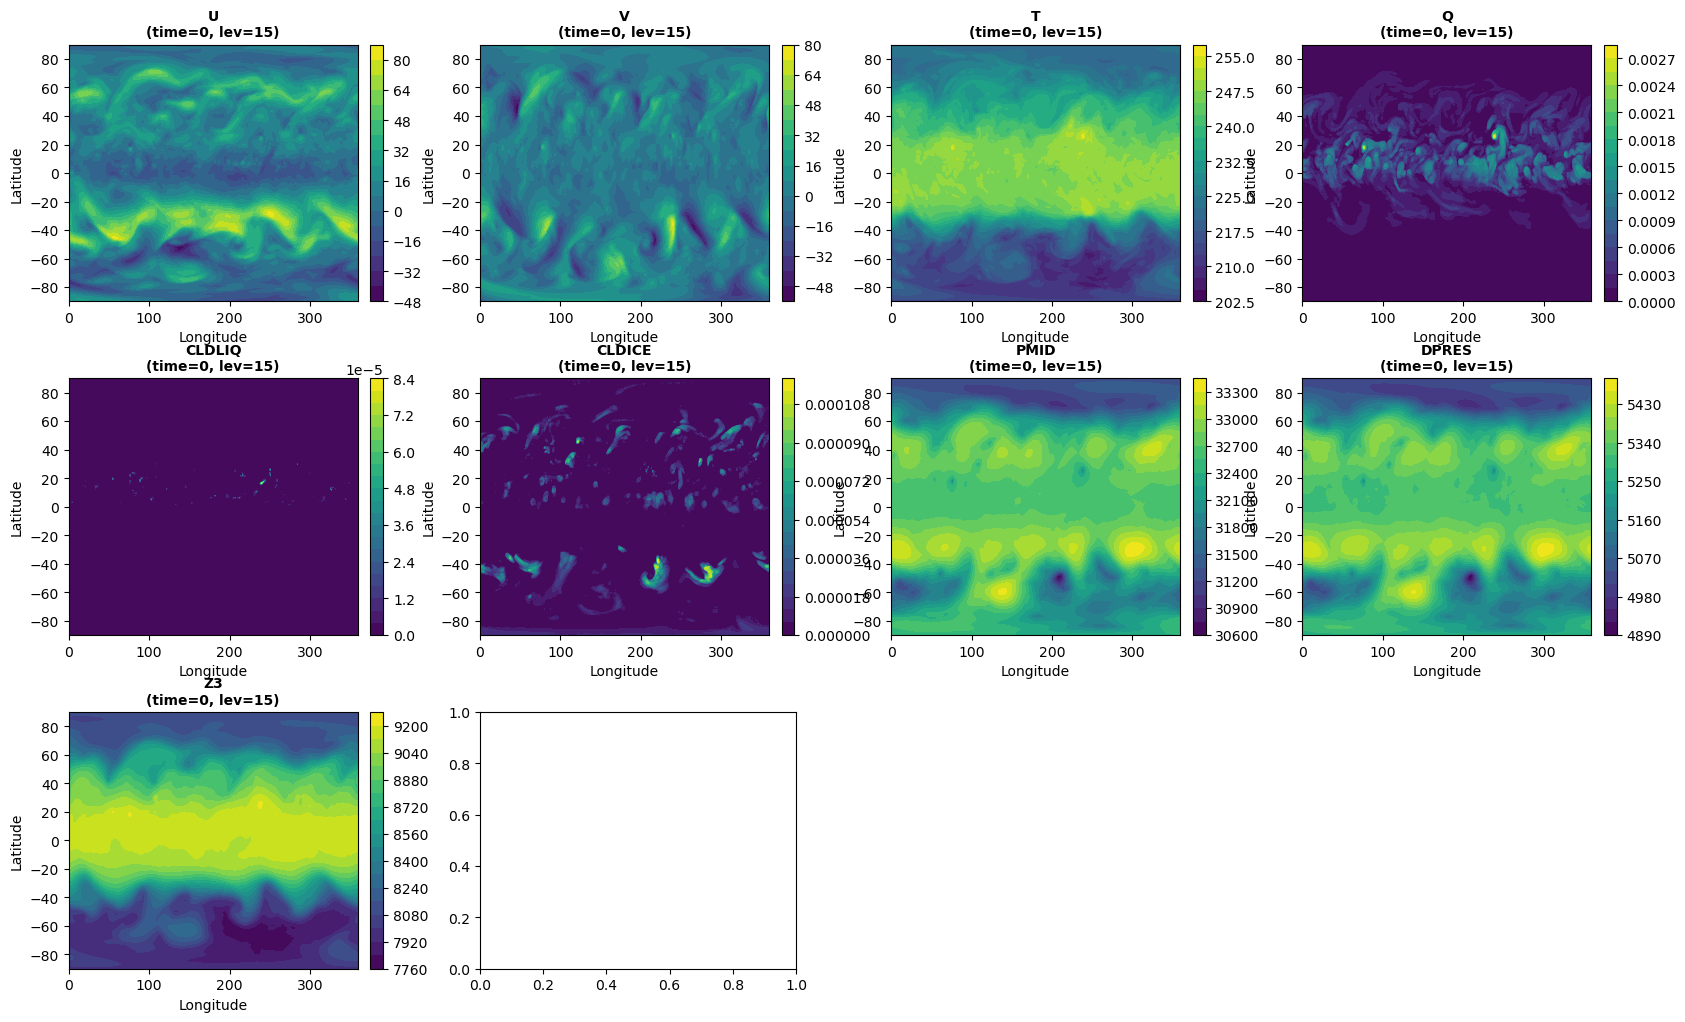

In [6]:
# 可视化输入变量1 (30层变量)
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

for idx, var_name in enumerate(inputs_variable1):
    if var_name in ds:
        ax = fig.add_subplot(gs[idx // 4, idx % 4])
        var_data = ds[var_name]
        
        # 选择第一个时间步和中间层（如果有层维度）
        if 'lev' in var_data.dims:
            middle_lev = len(var_data.lev) // 2
            plot_data = var_data.isel(time=0, lev=middle_lev)
            title = f'{var_name}\n(time=0, lev={middle_lev})'
        else:
            plot_data = var_data.isel(time=0)
            title = f'{var_name}\n(time=0)'
        
        # 绘制2D图
        im = ax.contourf(plot_data.lon, plot_data.lat, plot_data, 
                         levels=20, cmap='viridis')
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    else:
        print(f"变量 {var_name} 不在数据集中")

plt.suptitle('输入变量1 - 空间分布 (中间层)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 22402 (\N{CJK UNIFIED IDEOGRAPH-5782}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 21078 (\N{CJK UNIFIED IDEOGRAPH-5256}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Gly

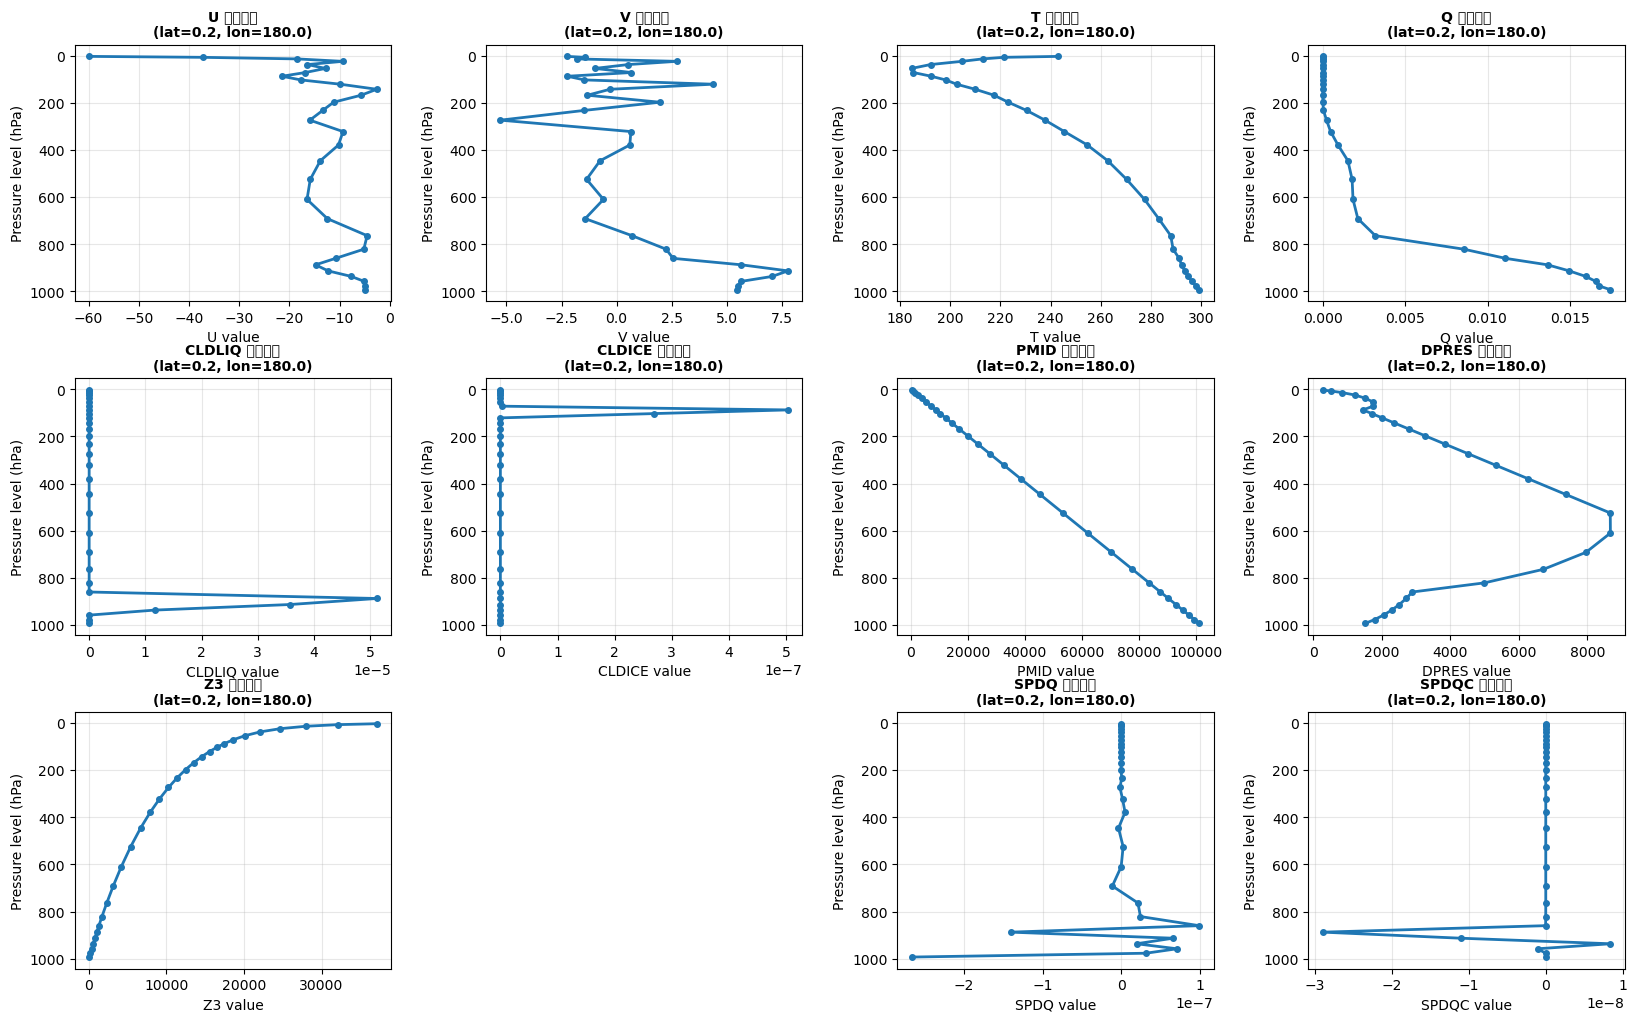

In [7]:
# 可视化输入变量1的垂直剖面（选择一个经纬度点）
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

# 选择一个中心点
lat_idx = len(ds.lat) // 2
lon_idx = len(ds.lon) // 2

for idx, var_name in enumerate(inputs_variable1):
    if var_name in ds and 'lev' in ds[var_name].dims:
        ax = fig.add_subplot(gs[idx // 4, idx % 4])
        var_data = ds[var_name]
        
        # 提取垂直剖面（所有层，固定经纬度）
        profile = var_data.isel(time=0, lat=lat_idx, lon=lon_idx)
        
        # 绘制垂直剖面
        ax.plot(profile.values, profile.lev.values, 'o-', linewidth=2, markersize=4)
        ax.set_xlabel(f'{var_name} value')
        ax.set_ylabel('Pressure level (hPa)')
        ax.set_title(f'{var_name} 垂直剖面\n(lat={float(ds.lat[lat_idx]):.1f}, lon={float(ds.lon[lon_idx]):.1f})', 
                     fontsize=10, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.invert_yaxis()  # 反转y轴，使高压在下

plt.suptitle('输入变量1 - 垂直剖面图', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 2. 输入变量2可视化 (单层变量)

IndexError: index 2 is out of bounds for axis 0 with size 2

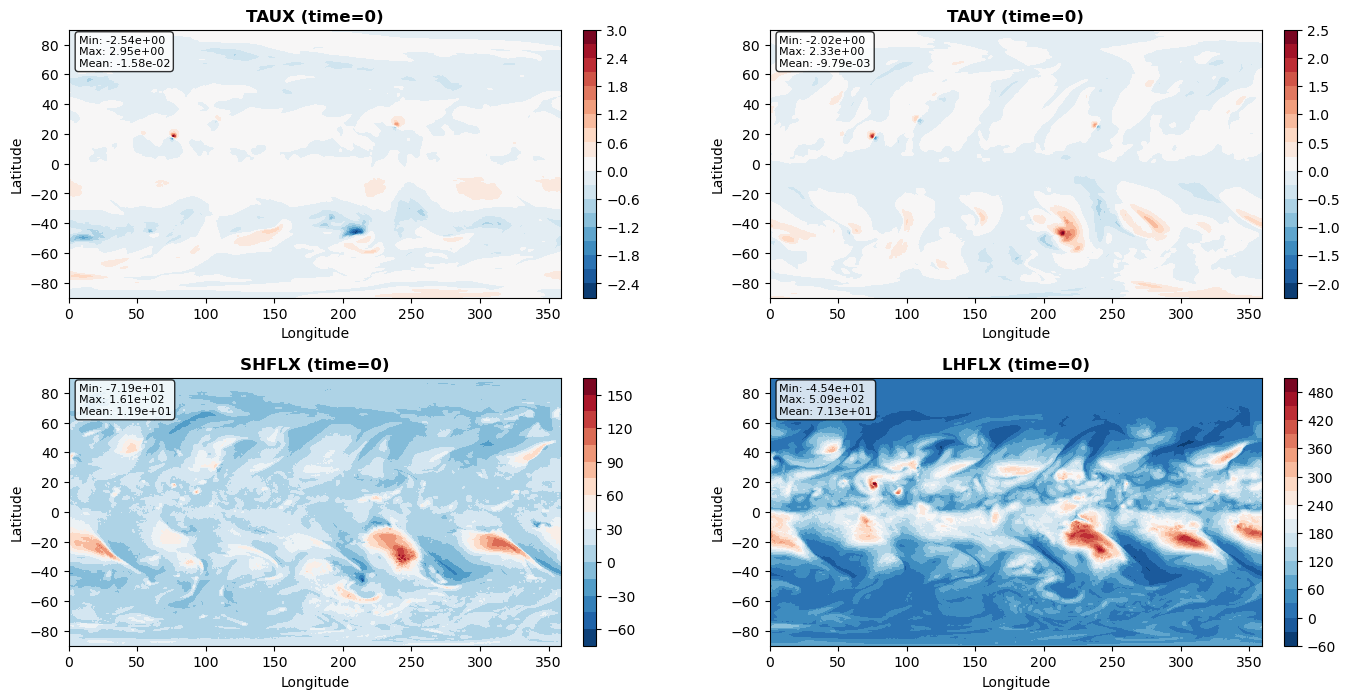

In [8]:
# 可视化输入变量2 (单层变量)
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

for idx, var_name in enumerate(inputs_variable2):
    if var_name in ds:
        ax = fig.add_subplot(gs[idx // 2, idx % 2])
        var_data = ds[var_name]
        
        # 选择第一个时间步
        plot_data = var_data.isel(time=0)
        
        # 绘制2D图
        im = ax.contourf(plot_data.lon, plot_data.lat, plot_data, 
                         levels=20, cmap='RdBu_r')
        ax.set_title(f'{var_name} (time=0)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # 添加统计信息
        ax.text(0.02, 0.98, f'Min: {float(plot_data.min()):.2e}\nMax: {float(plot_data.max()):.2e}\nMean: {float(plot_data.mean()):.2e}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=8)
    else:
        print(f"变量 {var_name} 不在数据集中")

plt.suptitle('输入变量2 - 空间分布', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. 输出变量1可视化 (30层变量)

/tmp/ipykernel_2600150/1557411214.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools

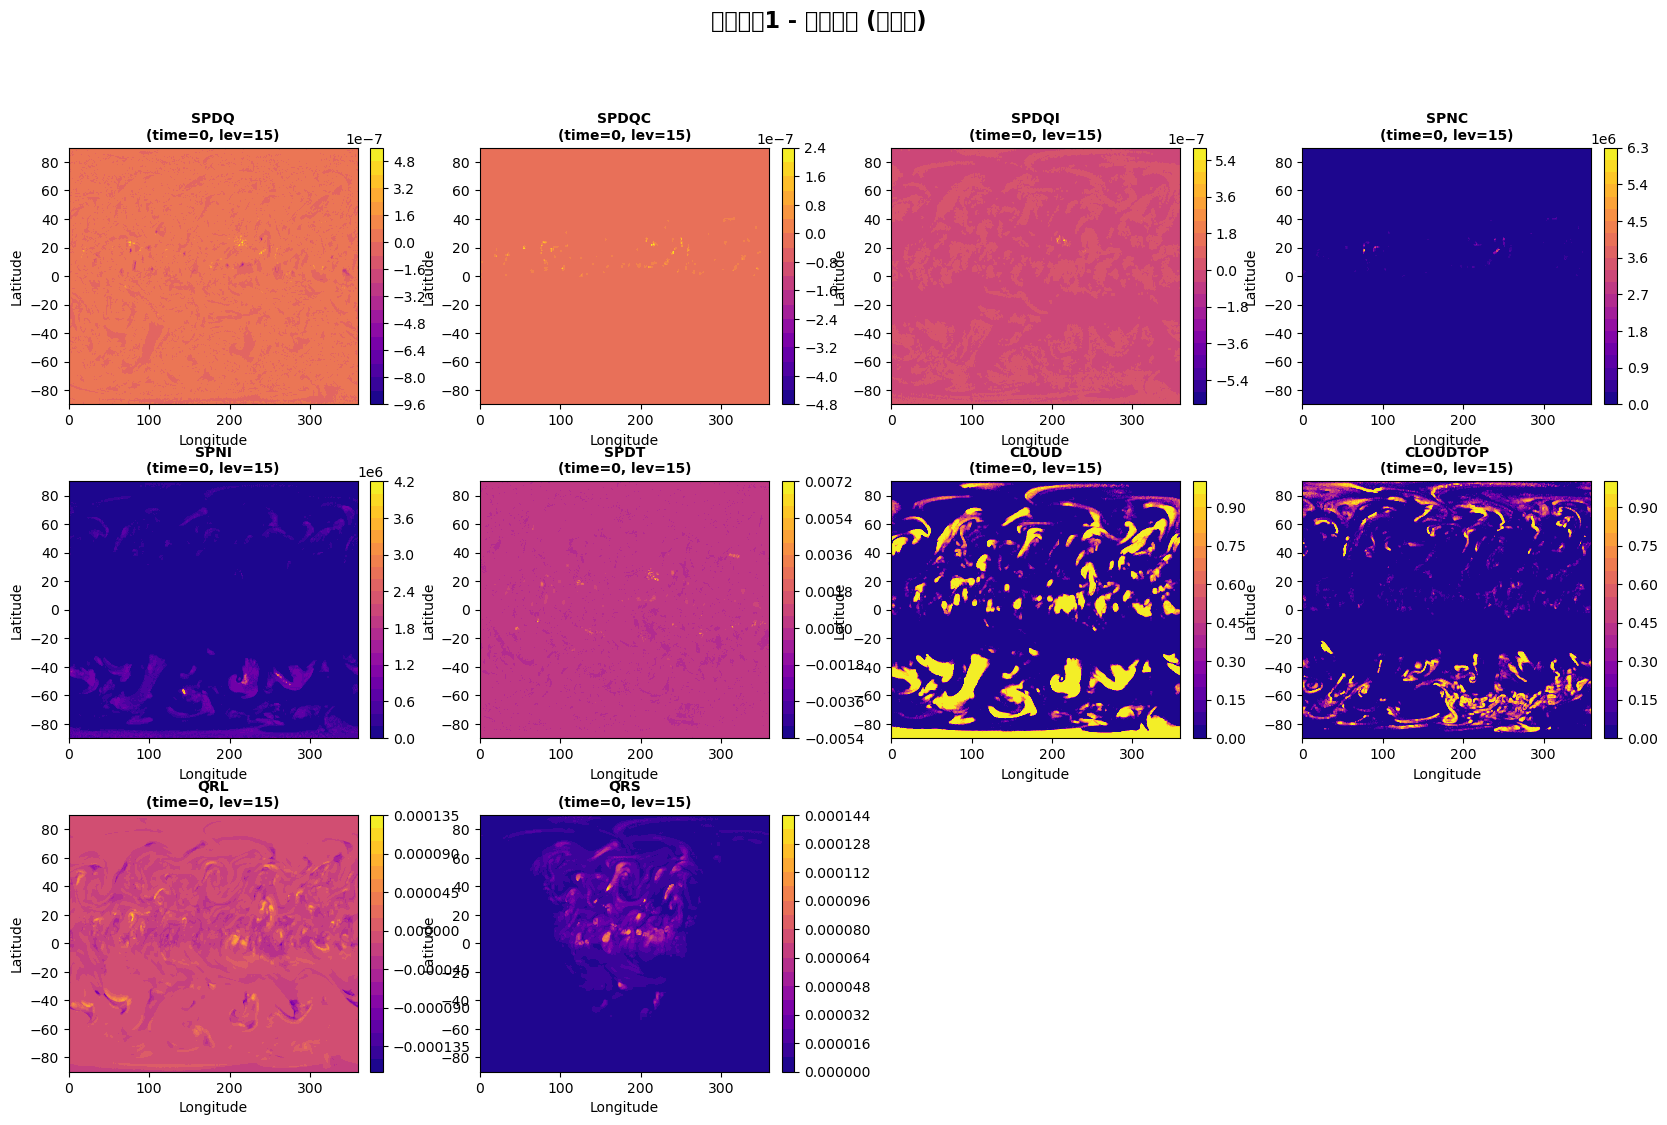

In [9]:
# 可视化输出变量1 (30层变量)
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

for idx, var_name in enumerate(output_variable1):
    if var_name in ds:
        ax = fig.add_subplot(gs[idx // 4, idx % 4])
        var_data = ds[var_name]
        
        # 选择第一个时间步和中间层（如果有层维度）
        if 'lev' in var_data.dims:
            middle_lev = len(var_data.lev) // 2
            plot_data = var_data.isel(time=0, lev=middle_lev)
            title = f'{var_name}\n(time=0, lev={middle_lev})'
        else:
            plot_data = var_data.isel(time=0)
            title = f'{var_name}\n(time=0)'
        
        # 绘制2D图
        im = ax.contourf(plot_data.lon, plot_data.lat, plot_data, 
                         levels=20, cmap='plasma')
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    else:
        print(f"变量 {var_name} 不在数据集中")

plt.suptitle('输出变量1 - 空间分布 (中间层)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

/tmp/ipykernel_224792/1602282473.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22402 (\N{CJK UNIFIED IDEOGRAPH-5782}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21078 (\N{CJK UNIFIED IDEOGRAPH-5256}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.

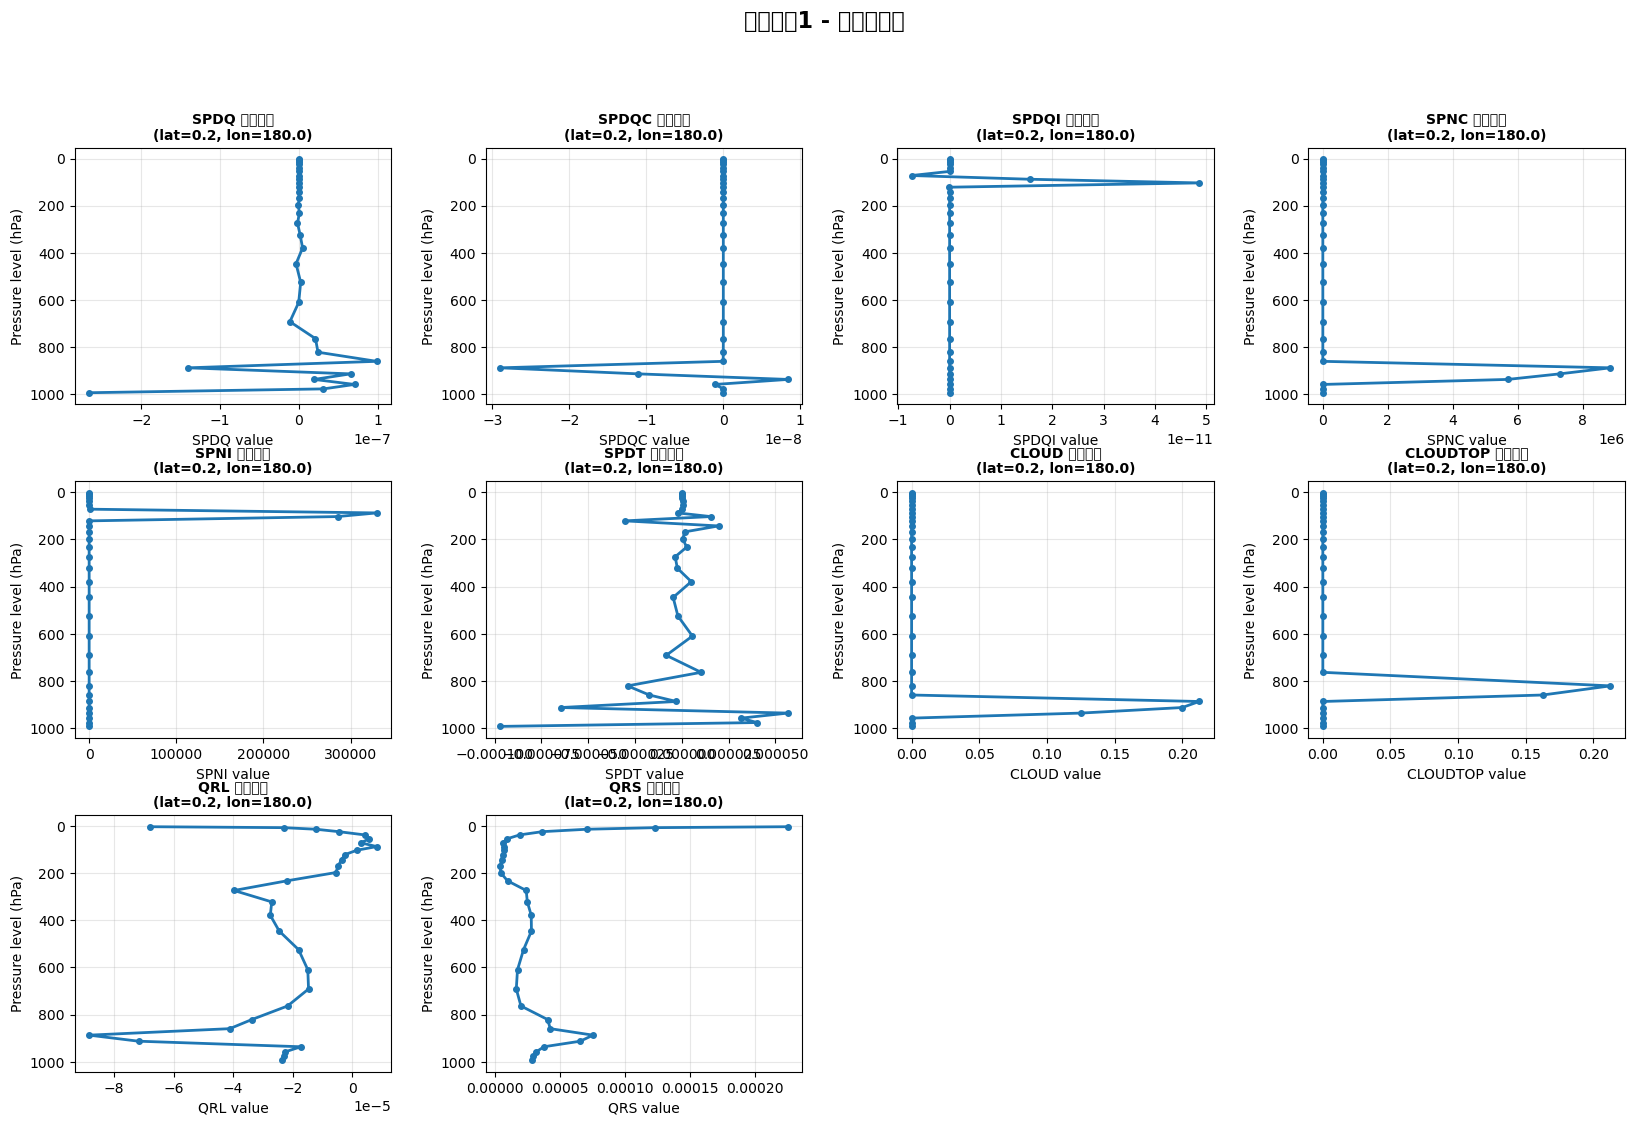

In [7]:
# 可视化输出变量1的垂直剖面
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

# 选择一个中心点
lat_idx = len(ds.lat) // 2
lon_idx = len(ds.lon) // 2

for idx, var_name in enumerate(output_variable1):
    if var_name in ds and 'lev' in ds[var_name].dims:
        ax = fig.add_subplot(gs[idx // 4, idx % 4])
        var_data = ds[var_name]
        
        # 提取垂直剖面
        profile = var_data.isel(time=0, lat=lat_idx, lon=lon_idx)
        
        # 绘制垂直剖面
        ax.plot(profile.values, profile.lev.values, 'o-', linewidth=2, markersize=4)
        ax.set_xlabel(f'{var_name} value')
        ax.set_ylabel('Pressure level (hPa)')
        ax.set_title(f'{var_name} 垂直剖面\n(lat={float(ds.lat[lat_idx]):.1f}, lon={float(ds.lon[lon_idx]):.1f})', 
                     fontsize=10, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.invert_yaxis()

plt.suptitle('输出变量1 - 垂直剖面图', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 4. 输出变量2可视化 (单层变量)

/tmp/ipykernel_224792/4270017930.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.

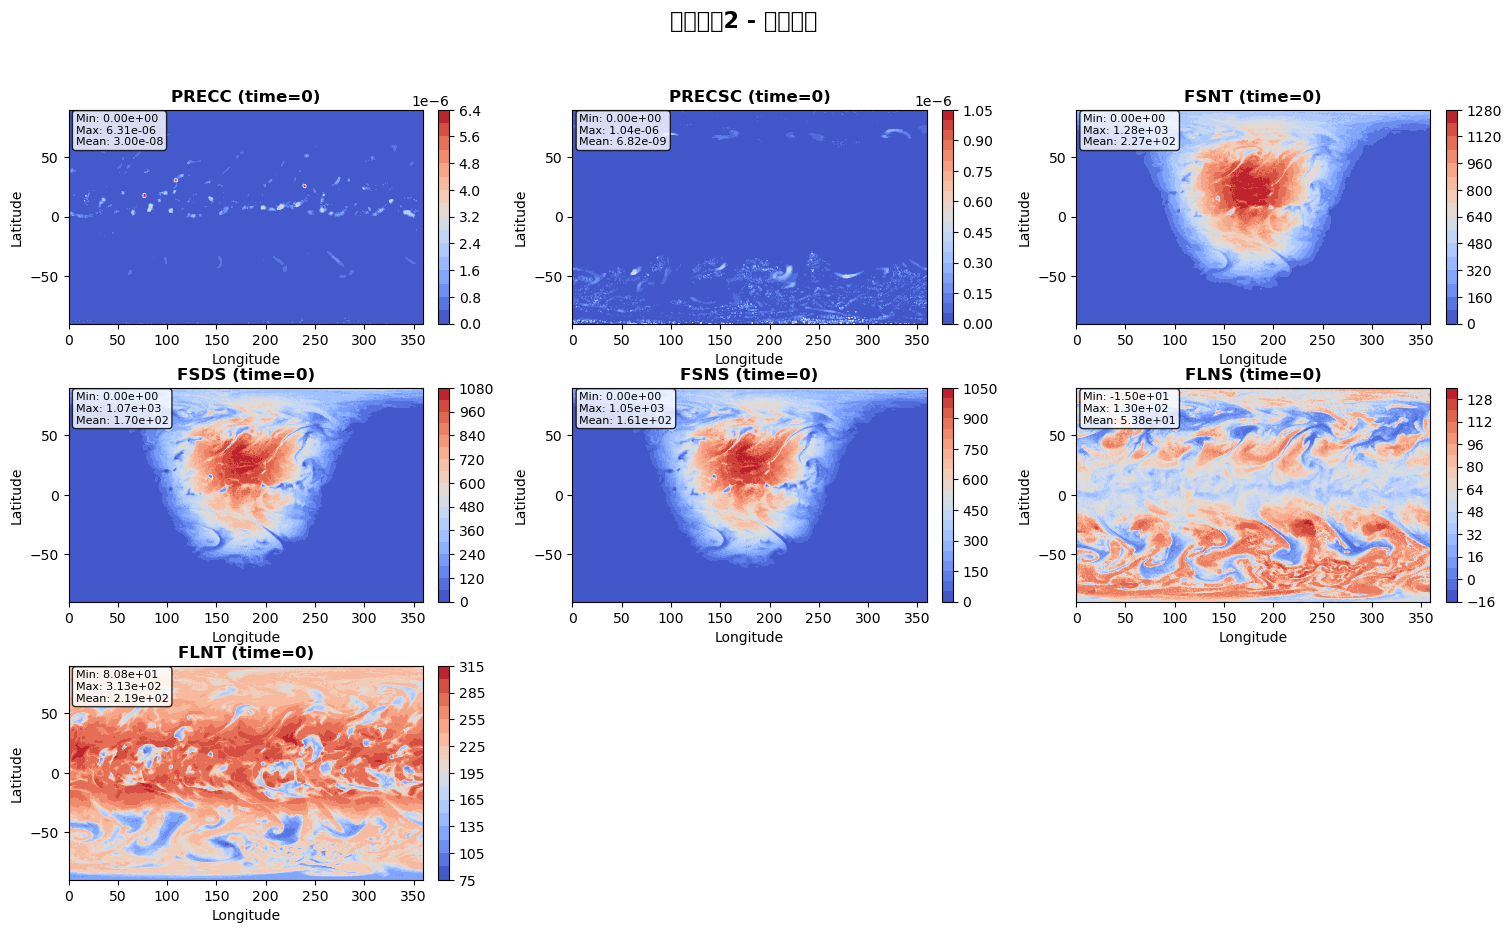

In [8]:
# 可视化输出变量2 (单层变量)
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

for idx, var_name in enumerate(output_variable2):
    if var_name in ds:
        ax = fig.add_subplot(gs[idx // 3, idx % 3])
        var_data = ds[var_name]
        
        # 选择第一个时间步
        plot_data = var_data.isel(time=0)
        
        # 绘制2D图
        im = ax.contourf(plot_data.lon, plot_data.lat, plot_data, 
                         levels=20, cmap='coolwarm')
        ax.set_title(f'{var_name} (time=0)', fontsize=12, fontweight='bold')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # 添加统计信息
        ax.text(0.02, 0.98, f'Min: {float(plot_data.min()):.2e}\nMax: {float(plot_data.max()):.2e}\nMean: {float(plot_data.mean()):.2e}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=8)
    else:
        print(f"变量 {var_name} 不在数据集中")

plt.suptitle('输出变量2 - 空间分布', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. 所有变量的统计汇总

In [9]:
# 创建所有变量的统计汇总表
import pandas as pd

all_variables = {
    '输入变量1 (30层)': inputs_variable1,
    '输入变量2 (单层)': inputs_variable2,
    '输出变量1 (30层)': output_variable1,
    '输出变量2 (单层)': output_variable2
}

stats_data = []

for category, var_list in all_variables.items():
    for var_name in var_list:
        if var_name in ds:
            var_data = ds[var_name].isel(time=0)
            stats_data.append({
                '类别': category,
                '变量名': var_name,
                '维度': str(var_data.dims),
                '形状': str(var_data.shape),
                '最小值': f'{float(var_data.min()):.4e}',
                '最大值': f'{float(var_data.max()):.4e}',
                '平均值': f'{float(var_data.mean()):.4e}',
                '标准差': f'{float(var_data.std()):.4e}'
            })

stats_df = pd.DataFrame(stats_data)
print("=" * 100)
print("所有变量统计汇总")
print("=" * 100)
display(stats_df)

所有变量统计汇总


,类别,变量名,维度,形状,最小值,最大值,平均值,标准差
0,输入变量1 (30层),U,"('lev', 'lat', 'lon')","(30, 384, 576)",-8.1041e+01,1.0526e+02,5.7878e+00,2.0199e+01
1,输入变量1 (30层),V,"('lev', 'lat', 'lon')","(30, 384, 576)",-8.5784e+01,7.2798e+01,6.4746e-02,1.0462e+01
2,输入变量1 (30层),T,"('lev', 'lat', 'lon')","(30, 384, 576)",1.7814e+02,3.0311e+02,2.4149e+02,3.0589e+01
3,输入变量1 (30层),Q,"('lev', 'lat', 'lon')","(30, 384, 576)",9.3197e-09,2.1724e-02,1.9332e-03,3.8028e-03
4,输入变量1 (30层),CLDLIQ,"('lev', 'lat', 'lon')","(30, 384, 576)",0.0000e+00,5.4976e-04,4.6996e-06,2.0529e-05
5,输入变量1 (30层),CLDICE,"('lev', 'lat', 'lon')","(30, 384, 576)",0.0000e+00,2.3318e-04,8.1666e-07,4.7756e-06
6,输入变量1 (30层),PMID,"('lev', 'lat', 'lon')","(30, 384, 576)",3.6435e+02,1.0372e+05,4.2303e+04,3.6147e+04
7,输入变量1 (30层),DPRES,"('lev', 'lat', 'lon')","(30, 384, 576)",2.7765e+02,8.9268e+03,3.3455e+03,2.4067e+03
8,输入变量1 (30层),Z3,"('lev', 'lat', 'lon')","(30, 384, 576)",5.8886e+01,3.9761e+04,1.1021e+04,1.0170e+04
9,输入变量1 (30层),HEIGHT,"('ilev', 'lat', 'lon')","(31, 384, 576)",0.0000e+00,4.3403e+04,1.1369e+04,1.0898e+04


## 6. 变量分布直方图

/tmp/ipykernel_224792/1128156632.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ET/yjzhou/HPCSoft/miniconda3/envs/mytorch/lib/python3.9/site-packages/IPython/core/pylabtools.

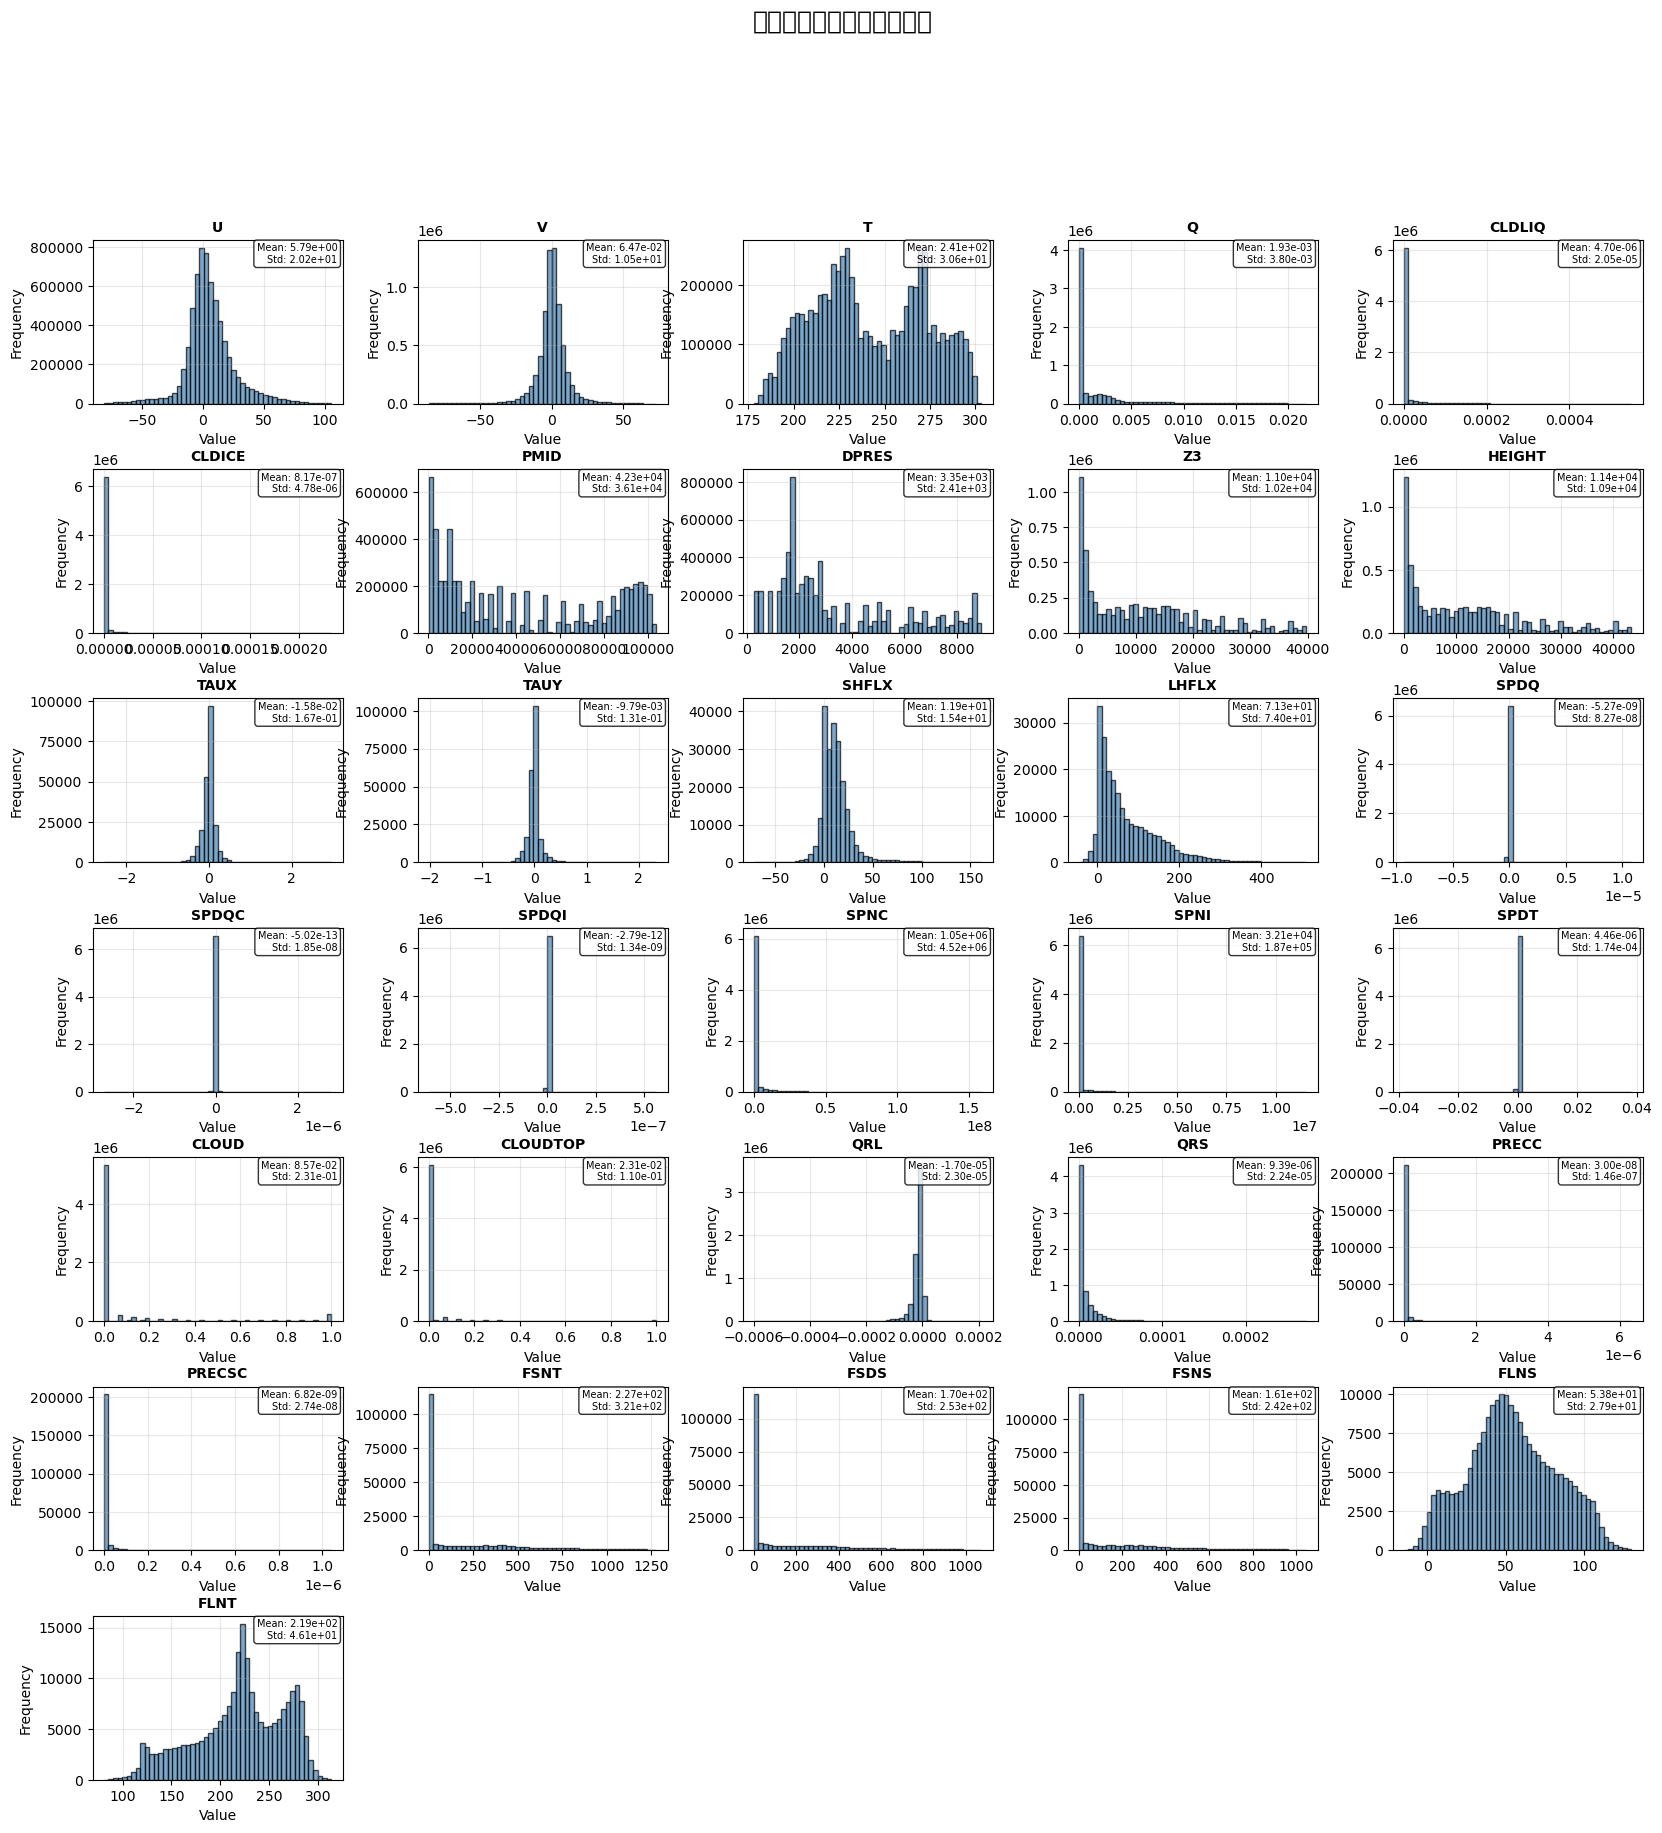

In [10]:
# 绘制所有变量的分布直方图
fig = plt.figure(figsize=(20, 20))
gs = GridSpec(7, 5, figure=fig, hspace=0.4, wspace=0.3)

plot_idx = 0
for category, var_list in all_variables.items():
    for var_name in var_list:
        if var_name in ds:
            row = plot_idx // 5
            col = plot_idx % 5
            ax = fig.add_subplot(gs[row, col])
            
            var_data = ds[var_name].isel(time=0).values.flatten()
            
            # 移除NaN值
            var_data = var_data[~np.isnan(var_data)]
            
            # 绘制直方图
            ax.hist(var_data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
            ax.set_title(f'{var_name}', fontsize=10, fontweight='bold')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            ax.grid(True, alpha=0.3)
            
            # 添加统计信息
            ax.text(0.98, 0.98, f'Mean: {np.mean(var_data):.2e}\nStd: {np.std(var_data):.2e}',
                    transform=ax.transAxes, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=7)
            
            plot_idx += 1

plt.suptitle('所有变量的数值分布直方图', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 7. 时间序列可视化 (选取一个代表点)

TypeError: float() argument must be a string or a number, not 'cftime._cftime.DatetimeNoLeap'

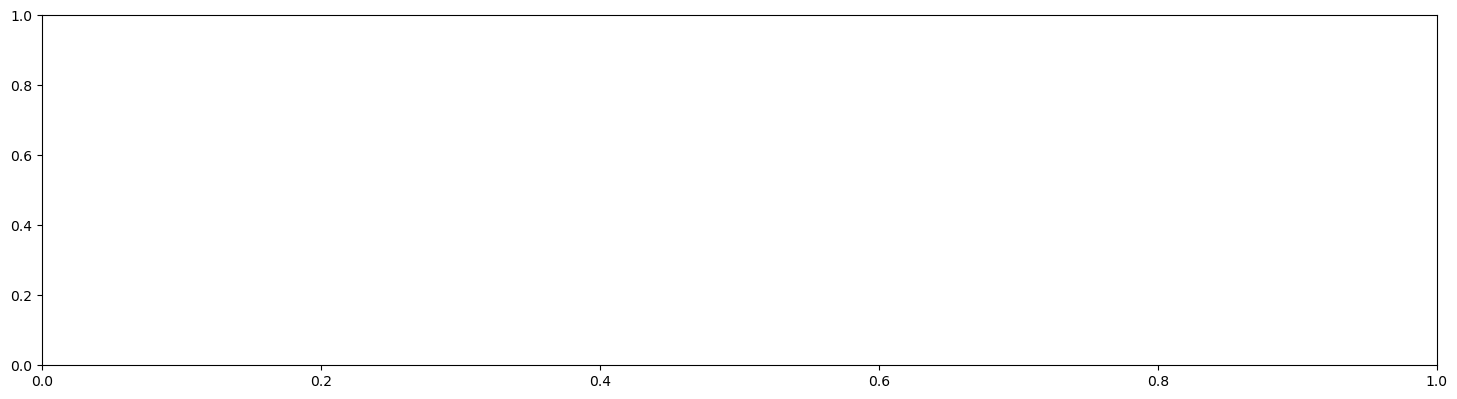

In [11]:
# 可视化单层变量的时间序列（输入变量2和输出变量2）
lat_idx = len(ds.lat) // 2
lon_idx = len(ds.lon) // 2

fig = plt.figure(figsize=(18, 10))

# 输入变量2的时间序列
ax1 = plt.subplot(2, 1, 1)
for var_name in inputs_variable2:
    if var_name in ds:
        time_series = ds[var_name].isel(lat=lat_idx, lon=lon_idx)
        ax1.plot(time_series.time, time_series.values, 'o-', label=var_name, linewidth=2, markersize=3)

ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.set_title(f'输入变量2 时间序列 (lat={float(ds.lat[lat_idx]):.1f}, lon={float(ds.lon[lon_idx]):.1f})', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# 输出变量2的时间序列
ax2 = plt.subplot(2, 1, 2)
for var_name in output_variable2:
    if var_name in ds:
        time_series = ds[var_name].isel(lat=lat_idx, lon=lon_idx)
        ax2.plot(time_series.time, time_series.values, 'o-', label=var_name, linewidth=2, markersize=3)

ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_title(f'输出变量2 时间序列 (lat={float(ds.lat[lat_idx]):.1f}, lon={float(ds.lon[lon_idx]):.1f})', 
              fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()